In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [ ]:
NUM_CLASSES = 27

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 28)             │           308 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,378 (5.38 KB)

 Trainable params: 1,378 (5.38 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
39/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0807 - loss: 3.1978   
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0915 - loss: 3.1553 - val_accuracy: 0.1513 - val_loss: 2.6482
Epoch 2/1000
 1/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.1484 - loss: 2.6946
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1924 - loss: 2.4815 - val_accuracy: 0.4003 - val_loss: 1.9362
Epoch 3/1000
 1/56 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.2578 - loss: 2.1192
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2821 - loss: 1.9320 - val_accuracy: 0.4231 - val_loss: 1.6129
Epoch 4/1000
54/56 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - accuracy: 0.3363 - loss: 1.7086
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.ke

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9236 - loss: 0.3432 


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[6.5297478e-01 3.7451580e-05 3.4010019e-09 4.4385526e-09 1.5493194e-08
 7.6241227e-09 2.9600105e-08 7.8986995e-10 2.6321608e-08 1.9536657e-08
 5.1166885e-06 3.4867917e-09 1.3043152e-01 1.9765017e-07 2.6928079e-08
 1.0017287e-08 7.9009030e-09 1.6792118e-09 2.1553276e-01 6.2039511e-09
 7.6857516e-09 2.0376531e-08 2.2927347e-08 9.0713555e-04 1.8109096e-08
 2.7460443e-08 1.1072594e-04 3.7848693e-09]
0


# Confusion matrix

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step


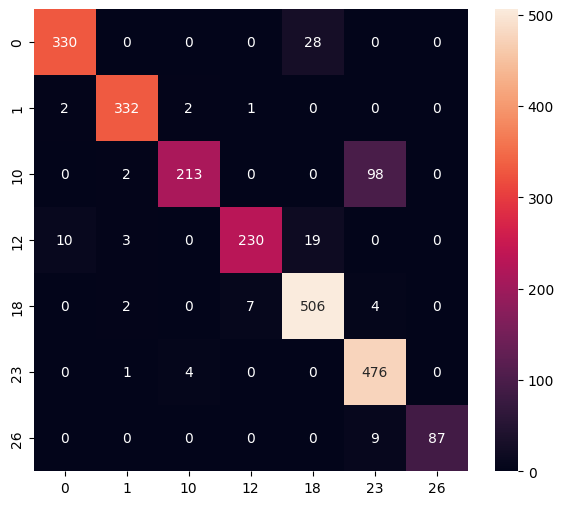

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       358
           1       0.98      0.99      0.98       337
          10       0.97      0.68      0.80       313
          12       0.97      0.88      0.92       262
          18       0.92      0.97      0.94       519
          23       0.81      0.99      0.89       481
          26       1.00      0.91      0.95        96

    accuracy                           0.92      2366
   macro avg       0.94      0.91      0.92      2366
weighted avg       0.93      0.92      0.92      2366



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\TIENTH~1\AppData\Local\Temp\tmp1il9qetk\assets


INFO:tensorflow:Assets written to: C:\Users\TIENTH~1\AppData\Local\Temp\tmp1il9qetk\assets


Saved artifact at 'C:\Users\TIENTH~1\AppData\Local\Temp\tmp1il9qetk'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 28), dtype=tf.float32, name=None)
Captures:
  1591858103920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1591858118176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1591858106736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1591858209968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1591858203456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1591858216656: TensorSpec(shape=(), dtype=tf.resource, name=None)


7612

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[6.52975023e-01 3.74515585e-05 3.40100326e-09 4.43852866e-09
 1.54931392e-08 7.62411112e-09 2.96000593e-08 7.89868726e-10
 2.63215156e-08 1.95366248e-08 5.11667076e-06 3.48678597e-09
 1.30431443e-01 1.97649669e-07 2.69279852e-08 1.00172510e-08
 7.90089061e-09 1.67920577e-09 2.15532750e-01 6.20394136e-09
 7.68574004e-09 2.03764987e-08 2.29272672e-08 9.07135021e-04
 1.81090662e-08 2.74603469e-08 1.10725974e-04 3.78486353e-09]
0
